# **CS412 - Machine Learning**
## Homework 1
100 pts


## **Goal**

The goal of this homework is three-fold:

*   Introduction to the machine learning experimental set up 
*   Gain experience with the Sklearn library
*   Learn which evaluation metric to choose in different scenarios

## **Dataset**
**JOB-A-THON - March 2022** Dataset contains the customer demographics and past activity with the bank. There is also the target label representing whether the customer will churn (stop working with the bank) or not.

Dataset is taken from: https://www.kaggle.com/datasets/gauravduttakiit/jobathon-march-2022

**Download the data from SuCourse**

## **Task**
Build a kNN and decision tree classifiers with the scikit library function calls to predict customer churn. Is_Churn is the target variable while the others will be used as features ('Age', 'Gender', 'Income', 'Balance', 'Vintage', 'Transaction_Status', 'Product_Holdings', 'Credit_Card', 'Credit_Category').

## **Software**: You may find the necessary function references here:
http://scikit-learn.org/stable/supervised_learning.html

## **Submission**: 
Name this notebook as: **YourName_Surname_hw1.ipynb** from the top left corner (e.g. for Özgür Can Seçkin -> Ozgur_Can_Seckin_hw1.ipynb)
Next, download this notebook as a *.ipynb document and upload* it on SuCourse. 


##**1) Initialize**

*   First make a copy of the notebook given to you as a starter.

*   Make sure you choose Connect form upper right.


##**2) Load training dataset** *(5 pts)*

Read the csv file:



In [1]:
# Load the Pandas libraries with alias 'pd' 
from google.colab import drive
import pandas as pd
import numpy as np

drive.mount('/content/drive/') 


# Read data
df = pd.read_csv('/content/drive/MyDrive/dataset.csv')




Mounted at /content/drive/


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##**3) Understanding the dataset** *(5 pts)*

There are alot of functions that can be used to know more about this dataset

- What is the shape of the training set (num of samples X number of attributes) ***(shape function can be used)***

- Get a quick summary of the data **(info can be used)**

- Display the first 5 rows from training dataset ***(head or sample functions can be used)***


Note: Understanding the features, possibly removing some features etc. is an important part in building an ML system.


In [3]:
df.head(5)

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
0,84e2fcc9,36,Female,5L - 10L,563266.44,4,0,1,0,Average,1.0
1,57fea15e,53,Female,Less than 5L,875572.11,2,1,1,1,Poor,0.0
2,8df34ef3,35,Female,More than 15L,701607.06,2,1,2,0,Poor,0.0
3,c5c0788b,43,Female,More than 15L,1393922.16,0,1,2,1,Poor,1.0
4,951d69c4,39,Female,More than 15L,893146.23,1,1,1,1,Good,1.0


In [4]:
df.columns

Index(['ID', 'Age', 'Gender', 'Income', 'Balance', 'Vintage',
       'Transaction_Status', 'Product_Holdings', 'Credit_Card',
       'Credit_Category', 'Is_Churn'],
      dtype='object')

In [5]:
df.shape

(9501, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9501 entries, 0 to 9500
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  9501 non-null   object 
 1   Age                 9501 non-null   int64  
 2   Gender              9501 non-null   object 
 3   Income              9501 non-null   object 
 4   Balance             9501 non-null   float64
 5   Vintage             9501 non-null   int64  
 6   Transaction_Status  9501 non-null   int64  
 7   Product_Holdings    9501 non-null   object 
 8   Credit_Card         9501 non-null   int64  
 9   Credit_Category     9501 non-null   object 
 10  Is_Churn            6650 non-null   float64
dtypes: float64(2), int64(4), object(5)
memory usage: 816.6+ KB


In [7]:
df.describe()

,Age,Balance,Vintage,Transaction_Status,Credit_Card,Is_Churn
count,9501.000000,9.501000e+03,9501.000000,9501.000000,9501.000000,6650.000000
mean,41.166825,8.061868e+05,2.241448,0.513104,0.665719,0.231128
std,9.664752,5.185852e+05,1.468193,0.499855,0.471763,0.421586
min,21.000000,6.300000e+01,0.000000,0.000000,0.000000,0.000000
25%,34.000000,3.952337e+05,1.000000,0.000000,0.000000,0.000000
50%,40.000000,7.651964e+05,2.000000,1.000000,1.000000,0.000000
75%,47.000000,1.149418e+06,3.000000,1.000000,1.000000,0.000000
max,72.000000,2.436616e+06,5.000000,1.000000,1.000000,1.000000


In [8]:
# print shape
print('Data Dimensionality: ', df.shape)

# print the summary for each column
print('Data Summary: ', df.info())


# print first 5 rows in your dataset
print('Head of Data: ', df.head(5))






Data Dimensionality:  (9501, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9501 entries, 0 to 9500
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  9501 non-null   object 
 1   Age                 9501 non-null   int64  
 2   Gender              9501 non-null   object 
 3   Income              9501 non-null   object 
 4   Balance             9501 non-null   float64
 5   Vintage             9501 non-null   int64  
 6   Transaction_Status  9501 non-null   int64  
 7   Product_Holdings    9501 non-null   object 
 8   Credit_Card         9501 non-null   int64  
 9   Credit_Category     9501 non-null   object 
 10  Is_Churn            6650 non-null   float64
dtypes: float64(2), int64(4), object(5)
memory usage: 816.6+ KB
Data Summary:  None
Head of Data:           ID  Age  Gender         Income     Balance  Vintage  \
0  84e2fcc9   36  Female       5L - 10L   563266.44        4

##**4) Seperate X and y Values** *(5 pts)*
First, you have to seperate X (features or independent variables) from y (target variable or dependent variables).

Note that our **dependent variable** is *'Is_Churn'* while the **independent variables** are: *'Age', 'Gender', 'Income', 'Balance', 'Vintage', 'Transaction_Status', 'Product_Holdings', 'Credit_Card', 'Credit_Category'*

*Hint: You can use drop method when defining X*

In [9]:
# Drop ID column:
df = df.drop(columns=["ID"])

# Define X:
X = df[['Age', 'Gender', 'Income', 
        'Balance', 'Vintage', 'Transaction_Status',
        'Product_Holdings', 'Credit_Card', 'Credit_Category']] 

# Define y:
y = df['Is_Churn']

##**5) Train - Test Split** *(5 pts)*
Since you will be going to apply cross validation, you do not need to use a validation set for now.

In [10]:
from sklearn.model_selection import train_test_split

# Split 80-20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)





##**6) Transform Features Into Numerical Format** *(10 pts)*
You can take:
*   Gender information as a binary variable
*   Income and Credit_Category as ordinal variables

The dictionaries that you are going to use are given below:

In [11]:
gender_map = {'Female':1, 'Male': 0}

Income_map = {'Less than 5L': 1, 
              '5L - 10L': 2,
              '10L - 15L': 3,
              'More than 15L': 4}
              
Credit_Category_map = {'Poor': 1,
                       'Average': 2,
                       'Good': 3}

Product_Holdings_map = {'3+': 3}

# You can use replace method to replace the values on training and test sets


In [12]:
X_train.Income.unique()

array(['More than 15L', '10L - 15L', '5L - 10L', 'Less than 5L'],
      dtype=object)

In [13]:
scale_mapper = {"Less than 5L":1, "5L - 10L":2, "10L - 15L":3, "More than 15L": 4}

X_train["Income"] = X_train["Income"].replace(scale_mapper)
X_test["Income"] = X_test["Income"].replace(scale_mapper)
X_val["Income"] = X_val["Income"].replace(scale_mapper)

In [14]:
X_train.Credit_Category.unique()

array(['Poor', 'Average', 'Good'], dtype=object)

In [15]:
scale_mapper = {"Poor":1, "Average":2, "Good":3}

X_train["Credit_Category"] = X_train["Credit_Category"].replace(scale_mapper)
X_test["Credit_Category"] = X_test["Credit_Category"].replace(scale_mapper)
X_val["Credit_Category"] = X_val["Credit_Category"].replace(scale_mapper)

In [16]:
X_train.Product_Holdings.unique()

array(['2', '1', '3+'], dtype=object)

In [17]:
scale_mapper = {"3+":3}

X_train["Product_Holdings"] = X_train["Product_Holdings"].replace(scale_mapper)
X_test["Product_Holdings"] = X_test["Product_Holdings"].replace(scale_mapper)
X_val["Product_Holdings"] = X_val["Product_Holdings"].replace(scale_mapper)

In [18]:
X_train.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [19]:
X_train.Gender = X_train.Gender.apply(lambda x: 1 if x=='F' else 0)
X_val.Gender = X_val.Gender.apply(lambda x: 1 if x=='F' else 0)
X_test.Gender = X_test.Gender.apply(lambda x: 1 if x=='F' else 0)

##**7) Select the Best Evaluation Metric** *(25 pts)*
Since our bank is very risk averse, it tries to minimize the number of credits that we call "good" but actually are "bad".

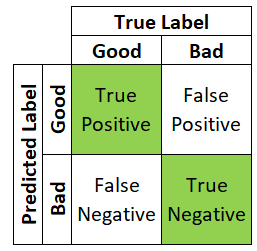

Which of the following performance metric should we employ in order to select the best model? (You can use the table above) Please write down the correct answer below (under **YOUR ANSWER HERE**) and explain your reasoning in one or two sentences.

1.   Accuracy
2.   Precision
3.   Recall

### YOUR ANSWER HERE:
### **We choose to use precision because the bank minimizes the false positives. When we minimize the false positives, the precision value is very high since the precision formula is TP/TP+FP; hence the value gets close to 1 which is what the bank aims for with the risk averse manner.**

##**8) Train a decision tree classifier on train data and do model selection using the validation data** *(30 pts)*

* Set number of folds in cross validation as 5 *(5 pts)*
* Set scoring parameter to what you have determined in the last question as `scoring = '...'` *(5 pts)*
* Use grid_search to apply hyperparameter tuning on decision tree classifier with max_depth = 3, 5, 7, 9, 11 *(10 pts)*
* Plot the validation set performance metrics for these settings where x axis denotes the k values and validation performance metrics are on y axis. *(10 pts)*

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
import sklearn

max_depth = [3, 5, 7, 9 , 11]

X_train = np.nan_to_num(X_train)
y_train = np.nan_to_num(y_train)


for depth in max_depth:
  clf_max_depth = DecisionTreeClassifier(max_depth=depth, random_state=42)

  clf_max_depth.fit(X_train, y_train)
  y_pred = clf_max_depth.predict(X_val)

# Train decision tree classifiers
knn = sklearn.neighbors.KNeighborsClassifier()
# initialize the values of k:
param_grid = {'n_neighbors':[3,5,7,9,11]}

# loop over values of k for the k-Nearest Neighbor classifier
grid = GridSearchCV(knn,
                    param_grid, 
                    cv=5,
                    scoring='precision',
                    return_train_score=False, 
                    verbose=1, 
                    refit=True)

grid_search = grid.fit(X_train, y_train)
grid_search.cv_results_

# Plot errors



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has featu

Fitting 5 folds for each of 5 candidates, totalling 25 fits


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'mean_fit_time': array([0.00611053, 0.00635962, 0.00623422, 0.00691438, 0.00638065]),
 'std_fit_time': array([0.00032371, 0.00024781, 0.00026245, 0.00090589, 0.00048618]),
 'mean_score_time': array([0.03006725, 0.03610682, 0.03081045, 0.04105043, 0.03407469]),
 'std_score_time': array([0.00288353, 0.00357557, 0.00250497, 0.01382269, 0.00565637]),
 'param_n_neighbors': masked_array(data=[3, 5, 7, 9, 11],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 3},
  {'n_neighbors': 5},
  {'n_neighbors': 7},
  {'n_neighbors': 9},
  {'n_neighbors': 11}],
 'split0_test_score': array([0.20588235, 0.15384615, 0.        , 0.        , 0.        ]),
 'split1_test_score': array([0.18292683, 0.09375   , 0.        , 0.        , 0.        ]),
 'split2_test_score': array([0.19480519, 0.16216216, 0.        , 0.        , 0.        ]),
 'split3_test_score': array([0.171875  , 0.12121212, 0.18181818, 0.        , 0.        ])

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

max_depth = [3, 5, 7, 9, 11]
X_train = np.nan_to_num(X_train)
y_train = np.nan_to_num(y_train)
y_test = np.nan_to_num(y_test)
y_pred = np.nan_to_num(y_pred)
y_val = np.nan_to_num(y_val)

for depth in max_depth:
  clf_max_depth = DecisionTreeClassifier(max_depth=depth, random_state=42)

  clf_max_depth.fit(X_train, y_train)

  # Predict the labels of the test data
  y_pred = clf_max_depth.predict(X_val)

  # Calculate the accuracy given the true labels and prediction of test data
  acc=accuracy_score(y_val, y_pred)
  print(f"Accuracy score for max_depth = {depth}: %.2f\n"%acc)

Accuracy score for max_depth = 3: 0.83

Accuracy score for max_depth = 5: 0.83

Accuracy score for max_depth = 7: 0.83

Accuracy score for max_depth = 9: 0.81

Accuracy score for max_depth = 11: 0.78



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has featu

In [27]:
clf_best = DecisionTreeClassifier(max_depth=5, random_state=42)
clf_best.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [28]:
y_pred = clf_best.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [29]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy score of the best model is:", acc)

Accuracy score of the best model is: 0.8253550762756444


##**9) Evaluate the Best Classifier on Test Set** *(15 pts)*

- Predict the labels of testing data. **Note that grid search cv function will return you the best estimator, so you can use directly the fitted function to make your predictions** and report the accuracy. 

In [21]:
# test prediction using a decision tree with all default parameters and ..... min-split value 
y_test = np.nan_to_num(y_test)
y_pred = np.nan_to_num(y_pred)

clf_best = DecisionTreeClassifier(max_depth=5, random_state=42)
clf_best.fit(X_train, y_train)
y_pred = clf_best.predict(X_test)


# Report your accuracy
from sklearn.metrics import accuracy_score # you can find your scoring metric in this library
acc = accuracy_score(y_test, y_pred)
print("Accuracy score of the best model is:", acc)

# Predict the labels of the test data
predictions = grid_search.predict(X_test)

# Calculate the accuracy given the true labels and prediction of test data
from sklearn.metrics import accuracy_score, f1_score

TestAccuracy = accuracy_score(y_test, predictions)
TestF1Score = f1_score(y_test, predictions)

print("Testing Accuracy = %.5f%%" % (TestAccuracy * 100))
print("Testing F-1 Score = %.5f%%" % (TestF1Score * 100))


Accuracy score of the best model is: 0.8253550762756444
Testing Accuracy = 78.22199%
Testing F-1 Score = 12.65823%


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


##**10) Submission**

Name this notebook as: **YourName_Surname_hw1.ipynb** from the top left corner (e.g. for Özgür Can Seçkin -> Ozgur_Can_Seckin_hw1.ipynb)
Next, download this notebook as a *.ipynb document and upload* it on SuCourse. 


## Questions? 

You can and should ask all your Google Colab related questions under Forums  and feel free to answer/share your answer regarding Colab. 

You can also ask/answer about which functions to use and what libraries... 

However you should **not ask** about the core parts, that is what is validation/test, which one shd. have higher performance, what are your scores etc.
